# Bar Chart

<IPython.core.display.Javascript object>


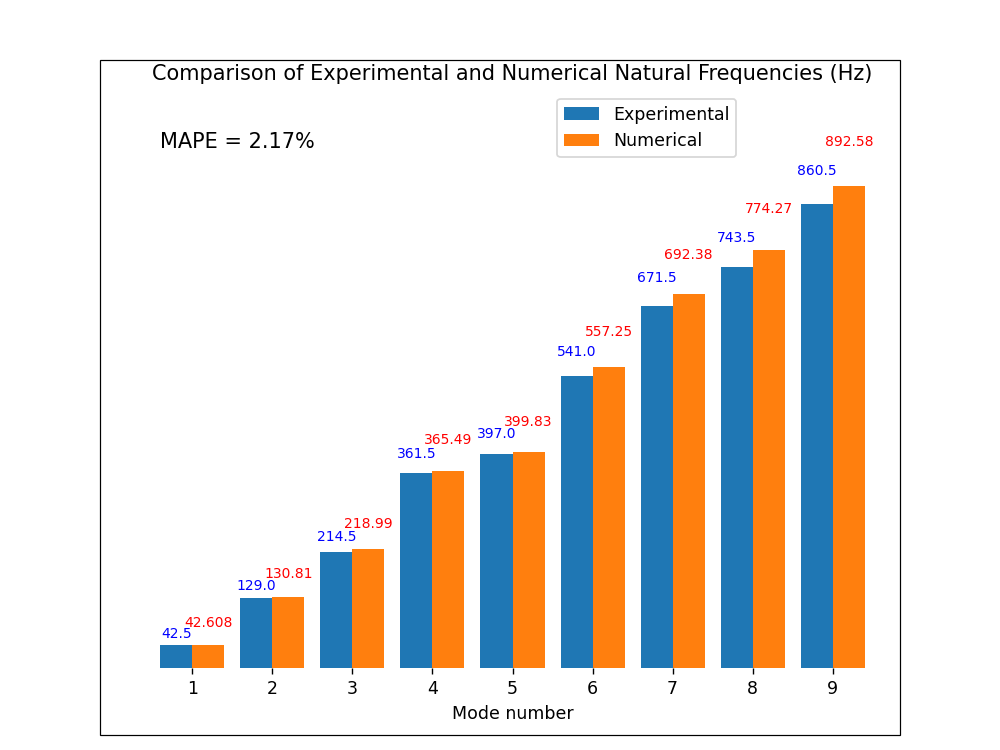

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# create the figure and the axis
# create the figure and the axis
fig, ax = plt.subplots(figsize=(8,6),dpi=100)

# set the x-axis values
xvals = [1, 2, 3, 4, 5, 6, 7, 8, 9]
experiment = [42.5,129,214.5,361.5,397,541,671.5,743.5,860.5]
numerical = [42.608,130.81,218.99,365.49,399.83,557.25,692.38,774.27,892.58]

# create the bar charts
bar1 = ax.bar(xvals, [0]*len(xvals), align='edge', width=0.4)
bar2 = ax.bar([x+0.4 for x in xvals], [0]*len(xvals), align='edge', width=0.4)

# set the x-axis tick labels
ax.set_xticks([x+0.4 for x in xvals])
ax.set_xticklabels(xvals)
ax.set_ylim(0,1000)
# remove the frame of the chart
for spine in ax.spines.values():
     spine.set_visible(False)
for label in ax.texts:
        label.set_visible(False)
#plt.ylabel('Frequency (Hz)')
plt.xlabel('Mode number')
plt.title('Comparison of Experimental and Numerical Natural Frequencies (Hz)')
ax.legend((bar1, bar2), ('Experimental', 'Numerical'), loc='upper right', bbox_to_anchor=(0.8, 1))
# add a legend and adjust its position

plt.gca().tick_params(bottom=True, top=False, left=False, right=False)
plt.gca().tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=False)

# Create the outline rectangle
rect = plt.Rectangle((0.10, 0.02), 0.80, 0.90, linewidth=0.7, edgecolor='black', facecolor='none')

# Add the outline rectangle to the figure
fig.add_artist(rect)

# define the update function for the animation
def update(y_values, bar1, bar2):
    for label in ax.texts:
        label.set_visible(False)
    y_values1, y_values2 = y_values
    # update the y-values for each bar
    for bar, new_height in zip(bar1, y_values1):
        bar.set_height(new_height)
    for bar, new_height in zip(bar2, y_values2):
        bar.set_height(new_height)

# create the animation using the update function and the desired number of frames
y_values_list1 = [[0]*len(xvals)] # initial frame with all y-values set to 0
y_values_list2 = [[0]*len(xvals)] # initial frame with all y-values set to 0

# generate additional frames with gradually increasing y-values
# generate additional frames with gradually increasing y-values
for i in range(1, 16):
    y_values_list1.append([y*i/15 for y in experiment])
    y_values_list2.append([y*i/15 for y in numerical])

# create the animation using the update function and the desired number of frames
ani = animation.FuncAnimation(fig, update, frames=list(zip(y_values_list1, y_values_list2))[:15], fargs=(bar1, bar2), 
                              repeat=False, interval=100, blit=True)
ani.event_source.stop()  # stop the animation

# store the y-values for the final frame
final_y_values1 = y_values_list1[-1]
final_y_values2 = y_values_list2[-1]

# define the function to add labels to the bars
# define the function to add labels to the bars
def add_labels(frame, bar1, bar2):
    # remove the labels from the previous frame
    for label in ax.texts:
        label.set_visible(False)
    # add label to the bar for the current frame
    for i, (bar1, bar2) in enumerate(zip(bar1, bar2)):
        if frame > i:
            ax.text(bar1.get_x() + bar1.get_width()/2, final_y_values1[i]+8-2*i, str(round(final_y_values1[i],2)), 
                ha='center', color='b', fontsize=8)
            ax.text(bar2.get_x() + bar2.get_width()/2, final_y_values2[i]+27-2*i, str(round(final_y_values2[i],3)), 
                ha='center', color='r', fontsize=8)
    # add mean error as a text
    ax.text(2, 900, str('MAPE = 2.17% '), 
                ha='center', color='black', fontsize=12)

# add labels to the bars one by one
# add labels to the bars one by one
ani_label = animation.FuncAnimation(fig, add_labels, frames=len(y_values_list1), fargs=(bar1, bar2), repeat=False, 
                                    interval=2000, blit=True)
#ani_label.event_source.stop()  # stop the animation

# show the plot
from IPython.display import HTML
animation_1_html = ani.to_jshtml()
animation_2_html = ani_label.to_jshtml()
HTML(animation_1_html + animation_2_html)

from matplotlib.animation import FFMpegWriter

# create an FFmpegWriter instance
writer = FFMpegWriter(fps=5, codec='libx264')

# open the file for writing
with writer.saving(fig, "E:\python\myplot/animationnew.gif", dpi=500):
    # write the first animation to the file
    for i in range(15):
        y_values = (y_values_list1[i], y_values_list2[i])
        update(y_values, bar1, bar2)
        writer.grab_frame()
    # write the second animation to the file
    ani_label.event_source.start()
    for i in range(len(y_values_list1)):
        add_labels(i, bar1, bar2)
        writer.grab_frame()
     # Set the loop parameter to 0 to play the animation only once
plt.savefig('E:\python\myplot/comparison.png', dpi=300)
plt.show()